In [2]:
import torch
import pandas as pd
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

/Users/reeceshuttleworth/Dropbox/Mac (3)/Documents/GitHub/958/958/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/gpt-neox-20b') # MPT reused this tokenizer.
data = pd.read_json("mpt_entropies_tinystories_data.json")

In [4]:
mpt_layers, mpt_heads = 32, 32
n = 20
avg_entropies = torch.zeros((mpt_layers, mpt_heads, n))
for storynum, story in enumerate(data):
    for layernum in range(mpt_layers):
        # for a certain story and a certain layer:
        last_n_entropy = torch.Tensor(data[story][f'layer {layernum}']['last_n_entropy'])
        # print(last_n_entropy[0].shape)
        avg_entropies[layernum] += last_n_entropy[0]

avg_entropies /= (storynum+1)

In [11]:
# layer 0:
# avg_entropies[0]


# layer 31:
avg_entropies[-1]

tensor([[0.2775, 0.2894, 0.2797, 0.2853, 0.2819, 0.2776, 0.2712, 0.2844, 0.2839,
         0.2860, 0.2846, 0.2885, 0.2856, 0.2962, 0.2851, 0.2987, 0.2875, 0.2902,
         0.2899, 0.2816],
        [0.7080, 0.7177, 0.7015, 0.6839, 0.6956, 0.6954, 0.6941, 0.7024, 0.6682,
         0.6939, 0.6920, 0.6987, 0.6986, 0.6959, 0.7130, 0.7182, 0.7101, 0.7115,
         0.7188, 0.6962],
        [1.1810, 1.1877, 1.1896, 1.1873, 1.1855, 1.1931, 1.1778, 1.1613, 1.1680,
         1.1882, 1.1866, 1.1894, 1.1933, 1.1996, 1.1937, 1.1972, 1.2100, 1.2007,
         1.1997, 1.2027],
        [1.0298, 1.0512, 1.0374, 1.0433, 1.0592, 1.0333, 1.0106, 1.0236, 1.0306,
         1.0383, 1.0334, 1.0256, 1.0355, 1.0397, 1.0518, 1.0429, 1.0375, 1.0393,
         1.0523, 1.0422],
        [1.3836, 1.3712, 1.3568, 1.3741, 1.3841, 1.3590, 1.3647, 1.3481, 1.3627,
         1.3545, 1.3755, 1.3749, 1.3830, 1.3927, 1.3713, 1.3575, 1.3535, 1.3900,
         1.4031, 1.4069],
        [0.2758, 0.2711, 0.2698, 0.2670, 0.2608, 0.2640, 0.2

In [6]:
# averaging across heads
avg_entropies.shape # (32,32,20)
avg_entropies_avg_heads = torch.mean(avg_entropies, dim=-2) # (32,20)
avg_entropies_avg_heads

tensor([[2.5784, 2.5798, 2.5860, 2.5815, 2.5908, 2.5915, 2.5870, 2.5888, 2.5913,
         2.5944, 2.5936, 2.5976, 2.5982, 2.6063, 2.6027, 2.6088, 2.6108, 2.6149,
         2.6088, 2.6138],
        [3.3899, 3.3968, 3.3949, 3.3987, 3.4038, 3.4023, 3.3995, 3.4030, 3.4052,
         3.4080, 3.4114, 3.4152, 3.4141, 3.4183, 3.4245, 3.4296, 3.4301, 3.4342,
         3.4327, 3.4348],
        [3.1495, 3.1552, 3.1542, 3.1566, 3.1600, 3.1620, 3.1589, 3.1601, 3.1607,
         3.1666, 3.1684, 3.1706, 3.1736, 3.1754, 3.1834, 3.1872, 3.1930, 3.1981,
         3.1969, 3.1954],
        [1.9333, 1.9273, 1.9217, 1.9262, 1.9255, 1.9325, 1.9402, 1.9410, 1.9374,
         1.9343, 1.9366, 1.9369, 1.9379, 1.9360, 1.9331, 1.9383, 1.9327, 1.9376,
         1.9387, 1.9419],
        [2.0703, 2.0571, 2.0557, 2.0746, 2.0609, 2.0741, 2.0785, 2.0822, 2.0728,
         2.0703, 2.0744, 2.0721, 2.0834, 2.0702, 2.0739, 2.0856, 2.0730, 2.0826,
         2.0845, 2.0958],
        [2.1515, 2.1569, 2.1541, 2.1553, 2.1596, 2.1581, 2.1

In [7]:
# last token of each seq with heads averaged:
avg_entropies_avg_heads[:,-1]

tensor([2.6138, 3.4348, 3.1954, 1.9419, 2.0958, 2.1856, 2.4446, 2.2418, 2.4577,
        2.3924, 2.6878, 2.6203, 2.6089, 2.6667, 2.7468, 2.7928, 2.2645, 2.1126,
        2.2247, 1.9078, 2.0270, 1.7400, 1.7388, 1.6947, 1.5126, 1.4283, 1.3530,
        1.5324, 1.4769, 1.6505, 1.4455, 2.8655])

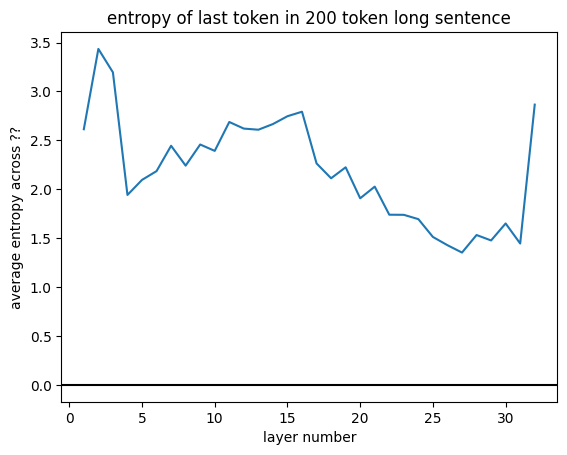

In [8]:
x = [i for i in range(1,33)]
y = avg_entropies_avg_heads[:,-1].tolist()
fig, axes = plt.subplots(nrows=1, ncols=1)
axes.plot(x,y)
axes.set(title='entropy of last token in 200 token long sentence', xlabel='layer number', ylabel='average entropy across ??')
plt.axhline(0, c='k')
plt.show()

tensor([[0.0127, 0.0527, 1.1549,  ..., 4.1882, 2.5782, 4.5924],
        [1.2143, 1.2855, 1.6450,  ..., 4.8980, 4.7742, 4.2244],
        [0.3145, 1.2642, 1.6025,  ..., 1.9481, 4.5714, 4.4814],
        ...,
        [0.2142, 1.3750, 0.9654,  ..., 1.6205, 0.8011, 1.1683],
        [1.0592, 0.6196, 0.5141,  ..., 0.8146, 2.4392, 3.0147],
        [0.2816, 0.6962, 1.2027,  ..., 5.2088, 4.9596, 3.7173]])


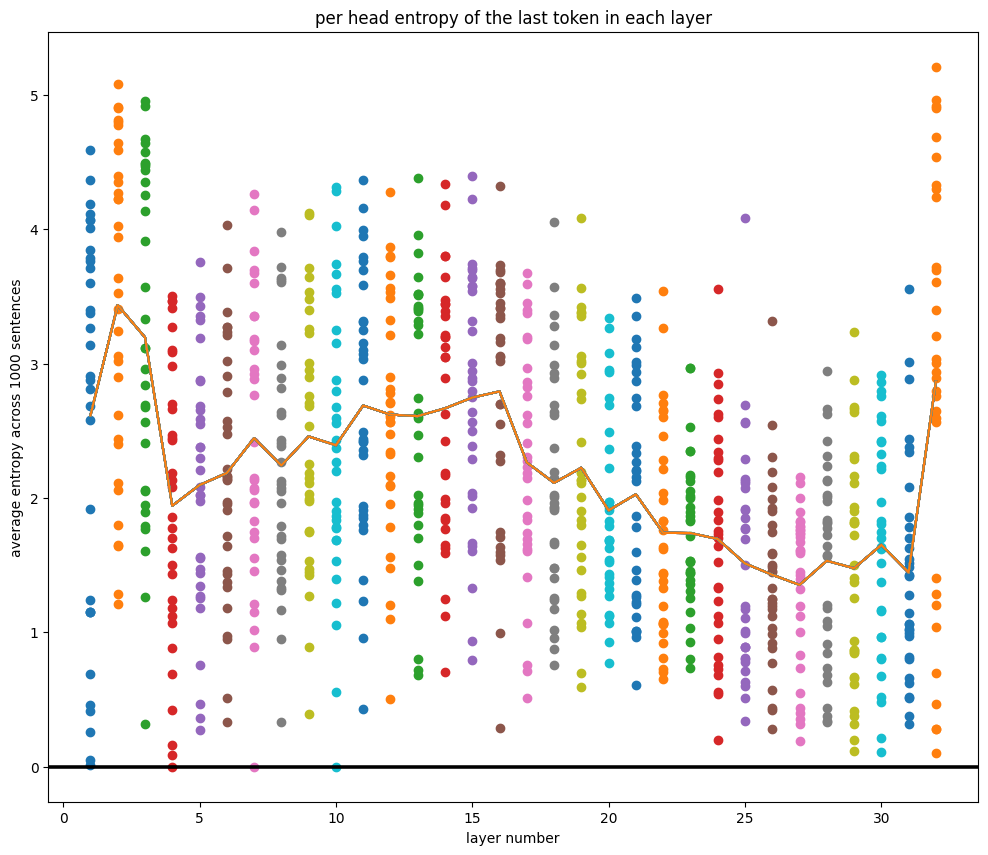

In [21]:
last_token_avg_entropies = avg_entropies[...,-1]
print(last_token_avg_entropies)
fig2, axes2 = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
for layernum,layer in enumerate(last_token_avg_entropies):
    # print(layer.shape)
    y2 = layer.tolist()
    axes2.scatter([layernum+1 for _ in range(len(y2))], y2)
    axes2.plot(x,y)
    axes2.set(title="per head entropy of the last token in each layer", xlabel='layer number', ylabel='average entropy across 1000 sentences')
    plt.axhline(0, c='k')
plt.show()


tensor([[0.0141, 0.0549, 1.1603,  ..., 4.1893, 2.5723, 4.5979],
        [1.2200, 1.2813, 1.6463,  ..., 4.8867, 4.7503, 4.2285],
        [0.3092, 1.2687, 1.6159,  ..., 1.9415, 4.5812, 4.4812],
        ...,
        [0.2101, 1.3658, 0.9914,  ..., 1.6407, 0.8009, 1.1304],
        [1.0653, 0.6281, 0.5156,  ..., 0.8116, 2.4606, 3.0134],
        [0.2902, 0.7115, 1.2007,  ..., 5.1992, 4.9460, 3.7050]])


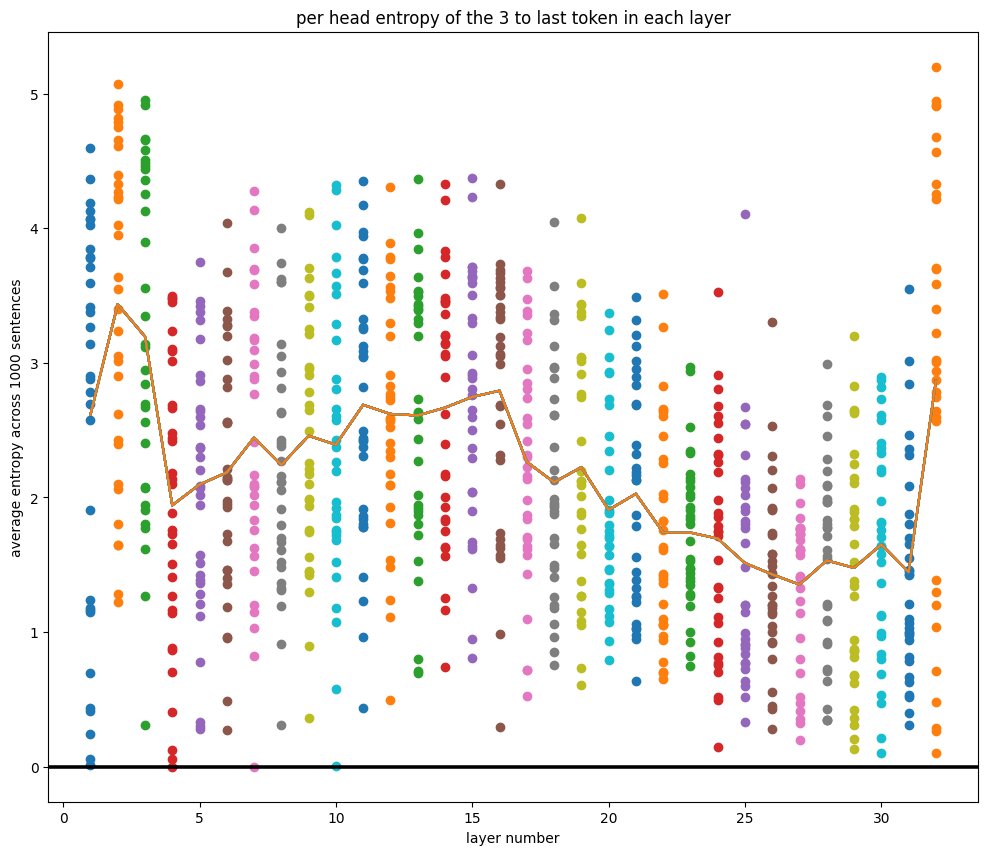

In [22]:
# im worried that this is the same graph
n_last_token = 3
single_token_avg_entropies = avg_entropies[...,-n_last_token]
print(single_token_avg_entropies)
fig2, axes2 = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
for layernum,layer in enumerate(single_token_avg_entropies):
    # print(layer.shape)
    y2 = layer.tolist()
    axes2.scatter([layernum+1 for _ in range(len(y2))], y2)
    axes2.plot(x,y)
    axes2.set(title=f"per head entropy of the {n_last_token} to last token in each layer", xlabel='layer number', ylabel='average entropy across 1000 sentences')
    plt.axhline(0, c='k')
plt.show()

In [12]:
# maximum entropy for 100 length story:
def max_entropy(seq_len):
    a = torch.Tensor([1/seq_len for _ in range(seq_len)])
    max_a = -torch.sum(a*torch.log(a))
    print(f'maximum possible entropy of seq_len {seq_len}: {max_a}')

max_entropy(200)
max_entropy(100) # 0.5
max_entropy(50) # 0.75
max_entropy(25) # 0.875

maximum possible entropy of seq_len 200: 5.298316955566406
maximum possible entropy of seq_len 100: 4.605169773101807
maximum possible entropy of seq_len 50: 3.9120233058929443
maximum possible entropy of seq_len 25: 3.2188756465911865
